In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

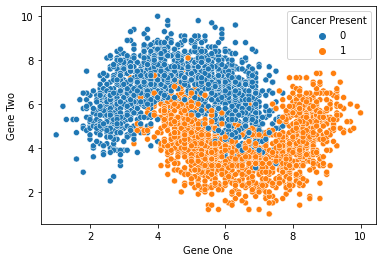

In [6]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present')

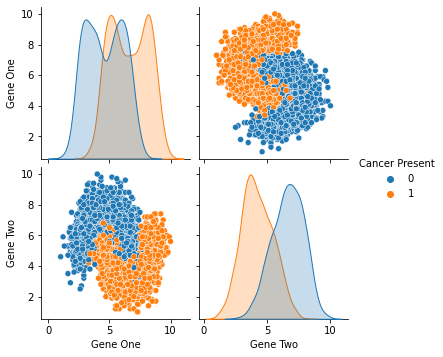

In [7]:
sns.pairplot(data = df, hue = 'Cancer Present')

In [8]:
X = df.drop('Cancer Present', axis = 1)
y = df['Cancer Present']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [16]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred = knn_model.predict(scaled_X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
confusion_matrix(y_test, y_pred)

array([[382,  41],
       [ 31, 446]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.94      0.93       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [25]:
test_error_rates = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred = knn_model.predict(scaled_X_test)
    
    error_rate = 1 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(error_rate)
    

Text(0, 0.5, 'Error rate')

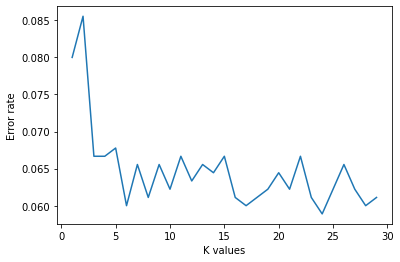

In [28]:
plt.plot(range(1, 30), test_error_rates)
plt.xlabel('K values')
plt.ylabel('Error rate')

In [29]:
scaler = StandardScaler()

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [32]:
operations = [('scaler', scaler), ('knn', knn)]


In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipe = Pipeline(operations)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
k_values = list(range(1, 20))

In [43]:
param_grid = {'knn__n_neighbors': k_values}

In [44]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [45]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [46]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 19}

In [47]:
y_predict = full_cv_classifier.predict(X_test)

In [48]:
accuracy_score(y_test, y_predict)

0.9377777777777778

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

